# Repeting tests until you get a positive result
Sometimes in reaearch we will get a nearly positive result, a p value of 0.06 for example is very close to being significant but not quite. In this case many people are tempted to add another couple of repeats and statistically test the result again.

In this notebook we will test the validity of this process. We will make two sets of data both taken from the same underlying distribution, so we know that any positive results we get are flase positives. Initially there will just be 3 values in each of these data sets. Then we will use a t-test to see if there are any statistically significant differences between the results, we expect this to be true 5% of the time as this is our chosen false positve rate, or threshold p-value. 

If we get a (false) positive result we will stop testing, as now we can write the paper. But if we don't we will add a another repeat and test again, some of these new tests will now also be false positives (as there are no real positives in our data). This increases the overall false positive rate.

In the example below we will keep on doing this process for up to 20 repeats to see what that does to the overall flase positive rate.

In [5]:
import numpy as np                 # Numeric functions
from scipy.stats import ttest_ind  # T-test statistical test
import seaborn as sns              # plotting
import matplotlib.pyplot as plt    # more plotting

In [6]:
threshold_p = 0.05
n_tests = 10000
n_repeats = 20
control_groups = np.random.randn(n_repeats, n_tests)
pos_result = np.zeros((n_repeats, n_tests), dtype=np.bool)
treatment_groups = np.random.randn(n_repeats, n_tests)

In [7]:
for i in range(3,n_repeats+1):
    for j in range(n_tests):
        if pos_result[i-2,j]:
            pos_result[i-1,j] = True
        else:
            _, p = ttest_ind(control_groups[0:i,j],treatment_groups[0:i,j])
            pos_result[i-1,j] = p < threshold_p


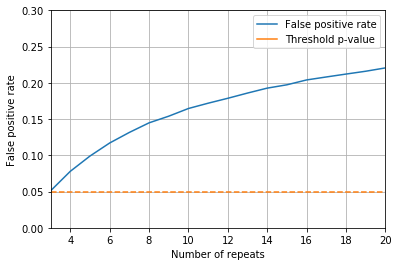

In [8]:
sns.lineplot(np.arange(n_repeats)[1:]+1, np.mean(pos_result,1)[1:], label='False positive rate')
ax = sns.lineplot([3,20], [0.05,0.05], label='Threshold p-value')
ax.lines[1].set_linestyle("--")
ax.set_ylim(0,0.3)
ax.set_xlim(3,20)
ax.set_xlabel('Number of repeats')
ax.set_ylabel('False positive rate')
ax.grid()
fig = plt.gcf()
fig.savefig('Repeating statistical tests.png', dpi = 600)

# What does this mean?
You can see that with this method, of repeating the measurment and statistically testing the result every time, we end up with a very high false positive rate. Clearly we must decide on the number of repeat tests to use in advance and only statistically test the result once.